# Homologous Site Sweep - Variable Length

## Introduction

In [16]:
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy  
import scikits.bootstrap as bootstrap
from scipy import stats
import matplotlib.gridspec as gridspec
#from IPython.display import Image
from PIL import Image
from IPython.display import Image as ipyImage

%matplotlib inline
%rehashx
pd.__version__

u'0.17.1'

In [17]:
%cd .
%pwd
%cd "~/tmp/raw_data/214_HGT_VarLength_HomologousSiteSweep/"
%mkdir "analysis"
%cd "analysis"
%pwd

/home/rosiec/tmp/raw_data/214_HGT_VarLength_HomologousSiteSweep/analysis
/home/rosiec/tmp/raw_data/214_HGT_VarLength_HomologousSiteSweep
mkdir: cannot create directory ‘analysis’: File exists
/home/rosiec/tmp/raw_data/214_HGT_VarLength_HomologousSiteSweep/analysis


u'/home/rosiec/tmp/raw_data/214_HGT_VarLength_HomologousSiteSweep/analysis'

In [18]:
#%pwd
%cat ../*5_hgtbonus_*001/data/log_average.dat | head -n 20

# Avida Fitness Data
# Sat Feb  6 00:19:41 2016
#  1: Update
#  2: Fitness
#  3: Fitness STE
#  4: Fitness Variance
#  5: Log Fitness
#  6: Log Fitness STE
#  7: Log Fitness Variance

0 0 0 0 -inf -nan -nan 
100 0.282469 0.00235182 0.0198786 -1.31325 0.00443625 0.070731 
200 5.63016 0.338452 412.035 -0.493359 0.0271656 2.65449 
300 490.401 102.184 3.72871e+07 0.933224 0.05049 9.10334 
400 529.19 33.5853 4.00655e+06 2.29671 0.0575424 11.7611 
500 78786.8 18797.4 1.24659e+12 2.44888 0.0616868 13.425 
600 4.55094e+09 1.77563e+09 1.11454e+22 2.99927 0.082697 24.1751 
700 6.37635e+14 4.48487e+14 7.09422e+32 3.15013 0.0904995 28.8867 
800 1.50157e+09 4.06718e+08 5.81449e+20 3.08712 0.0807986 22.9474 
900 2.0195e+11 1.13708e+11 4.52535e+25 3.09655 0.0818306 23.4369 
cat: write error: Broken pipe


In [19]:
import sys
sys.path.append("~/Dropbox/School_Docs/Research/research_scripts/")
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py --help

Usage: quickplot.py [options] outfile [input_file1 column1 "directory_glob1" name1 .. input_fileN columnN "directory_globN" nameN] 
          


Options:
  -h, --help            show this help message and exit
  -v, --verbose         print extra messages to stdout
  -d, --debug_messages  print debug messages to stdout
  --plotonly            Skip the aggregation step, and plot only, using
                        existing data files.
  -t TITLE, --title=TITLE
                        set a different title than outfile (default)
  -x XLABEL, --xlabel=XLABEL
                        X-axis Label
  -y YLABEL, --ylabel=YLABEL
                        Y-axis Label
  --data_members=MEMBER_COUNT
                        Number of Components from a given data source
                        (treatment)
  --alt_axis=ALT_AXIS   Use an alternative axis for the Nth data source
  --xtick_multiplier=XTICK_MULTIPLIER
                        X-axis Tick Multipliers
  --ylog                Y-axis logarithmic

## Fitnesses

Aggregating control
Aggregating H_1
Aggregating H_2
Aggregating H_3
Aggregating H_4
Aggregating H_5
Aggregating H_All

Plotting 214_fitness


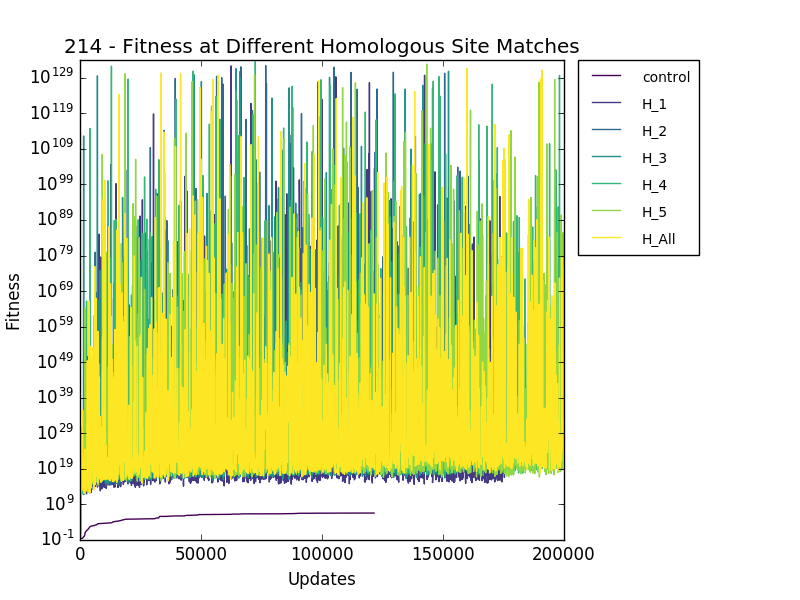

In [7]:
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py \
--samples 100 \
--ylog --title "214 - Fitness at Different Homologous Site Matches" \
--xlabel "Updates" --ylabel "Fitness" --xtick_multiplier 100 \
214_fitness \
average.dat 4 \"../H_1_control_*/data*/\" control \
average.dat 4 \"../H_1_hgtbonus_*/data*/\" H_1 \
average.dat 4 \"../H_2_hgtbonus_*/data*/\" H_2 \
average.dat 4 \"../H_3_hgtbonus_*/data*/\" H_3 \
average.dat 4 \"../H_4_hgtbonus_*/data*/\" H_4 \
average.dat 4 \"../H_5_hgtbonus_*/data*/\" H_5 \
average.dat 4 \"../H_All_hgtbonus_*/data*/\" H_All \

ipyImage(filename='214_fitness.png') 

Aggregating control
Aggregating H_1
Aggregating H_2
Aggregating H_3
Aggregating H_4
Aggregating H_5
Aggregating H_All

Plotting 214_log_fitness


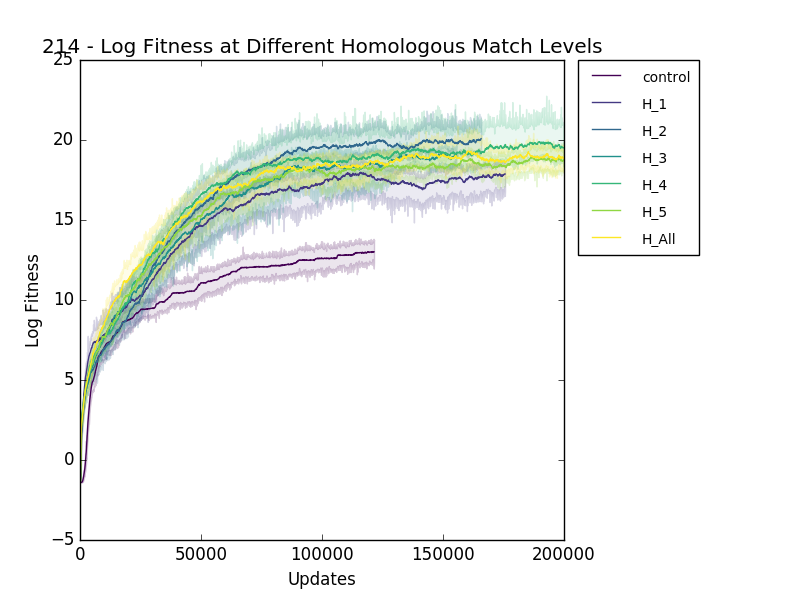

In [8]:
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py \
--error --samples 100 \
--title "214 - Log Fitness at Different Homologous Match Levels" \
--xlabel "Updates" --ylabel "Log Fitness" --xtick_multiplier 100 \
214_log_fitness \
log_average.dat 5 \"../H_1_control_*/data*/\" control \
log_average.dat 5 \"../H_1_hgtbonus_*/data*/\" H_1 \
log_average.dat 5 \"../H_2_hgtbonus_*/data*/\" H_2 \
log_average.dat 5 \"../H_3_hgtbonus_*/data*/\" H_3 \
log_average.dat 5 \"../H_4_hgtbonus_*/data*/\" H_4 \
log_average.dat 5 \"../H_5_hgtbonus_*/data*/\" H_5 \
log_average.dat 5 \"../H_All_hgtbonus_*/data*/\" H_All \


ipyImage(filename='214_log_fitness.png') 

## Uptake Rates

In [8]:
cat ../H_1_hgtbonus_*001/data*/hgt.dat | head -n 15

# Horizontal gene transfer statistics
# Thu Feb  4 21:19:17 2016
#  1: Update [update]
#  2: Total count of metabolized genome fragments [metcount]
#  3: Total size of metabolized genome fragments [metsize]
#  4: Total count of insertion events [inscount]
#  5: Total size of insertion events [inssize]
#  6: Simple count of insertion events [inscount] DEBUG-RCK
#  7: Simple count of uptake events [inscount] DEBUG-RCK
#  8: Simple count of recombination events [inscount] DEBUG-RCK
#  9: Simple count of bonus events [inscount] DEBUG-RCK
# 10: Simple count of uptake attempt events [inscount] DEBUG-RCK

0 0 0 0 0 0 0 0 0 0 
100 0 0 0 0 0 2532 258 2274 2532 
cat: write error: Broken pipe


### HGTBonus All Attempts, Uptakes, Bonuses, and Recombinations

In [ ]:
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py \
--error \
--samples 100 \
--title "214 - HGT Attempts, Uptakes, Recomb, Bonus" \
--xlabel "Updates" --ylabel "Events" --xtick_multiplier 100 \
--data_members 4 \
214_hgtbonus_attuptakerecbon \
hgt.dat 10 \"../H_1_control_*/data*/\" control_Attemp \
hgt.dat 7 \"../H_1_control_*/data*/\" control_Up \
hgt.dat 8 \"../H_1_control_*/data*/\" control_Rec \
hgt.dat 9 \"../H_1_control_*/data*/\" control_Bon \
\
hgt.dat 10 \"../H_1_hgtbonus*/data*/\" H_1_Attemp \
hgt.dat 7 \"../H_1_hgtbonus*/data*/\" H_1_Up \
hgt.dat 8 \"../H_1_hgtbonus*/data*/\" H_1_Rec \
hgt.dat 9 \"../H_1_hgtbonus*/data*/\" H_1_Bon \
\
hgt.dat 10 \"../H_2_hgtbonus*/data*/\" H_2_Attemp \
hgt.dat 7 \"../H_2_hgtbonus*/data*/\" H_2_Up \
hgt.dat 8 \"../H_2_hgtbonus*/data*/\" H_2_Rec \
hgt.dat 9 \"../H_2_hgtbonus*/data*/\" H_2_Bon \
\
hgt.dat 10 \"../H_3_hgtbonus*/data*/\" H_3_Attemp \
hgt.dat 7 \"../H_3_hgtbonus*/data*/\" H_3_Up \
hgt.dat 8 \"../H_3_hgtbonus*/data*/\" H_3_Rec \
hgt.dat 9 \"../H_3_hgtbonus*/data*/\" H_3_Bon \
\
hgt.dat 10 \"../H_4_hgtbonus*/data*/\" H_4_Attemp \
hgt.dat 7 \"../H_4_hgtbonus*/data*/\" H_4_Up \
hgt.dat 8 \"../H_4_hgtbonus*/data*/\" H_4_Rec \
hgt.dat 9 \"../H_4_hgtbonus*/data*/\" H_4_Bon \
\
hgt.dat 10 \"../H_5_hgtbonus*/data*/\" H_5_Attemp \
hgt.dat 7 \"../H_5_hgtbonus*/data*/\" H_5_Up \
hgt.dat 8 \"../H_5_hgtbonus*/data*/\" H_5_Rec \
hgt.dat 9 \"../H_5_hgtbonus*/data*/\" H_5_Bon
\
hgt.dat 10 \"../H_All_hgtbonus*/data*/\" H_All_Attemp \
hgt.dat 7 \"../H_All_hgtbonus*/data*/\" H_All_Up \
hgt.dat 8 \"../H_All_hgtbonus*/data*/\" H_All_Rec \
hgt.dat 9 \"../H_All_hgtbonus*/data*/\" H_All_Bon


ipyImage(filename='214_hgtbonus_attuptakerecbon.png') 

Aggregating control_Attemp
Aggregating H_1_Attemp
Aggregating H_2_Attemp
Aggregating H_3_Attemp
Aggregating H_4_Attemp
Aggregating H_5_Attemp
Aggregating H_All_Attemp

Plotting 214_hgtbonus_attempts


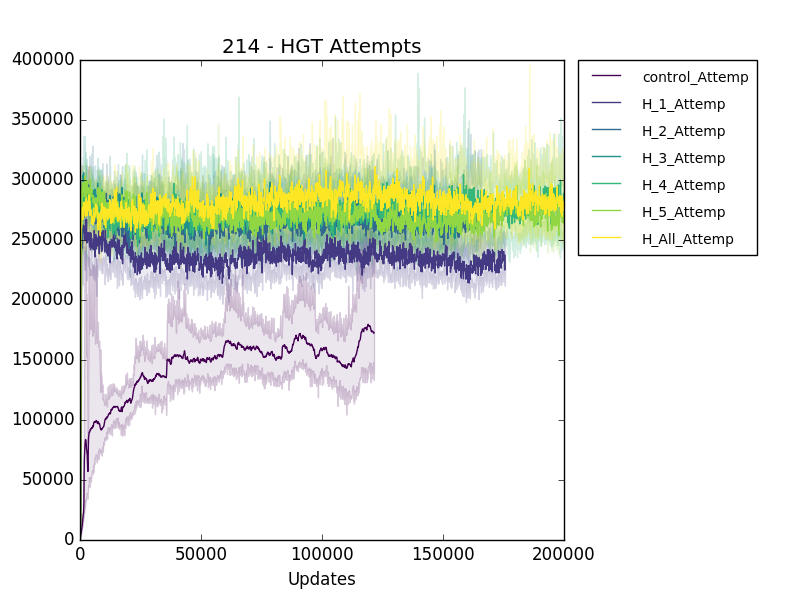

In [20]:
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py \
--error \
--samples 100 \
--title "214 - HGT Attempts" \
--xlabel "Updates" --ylabel "Events" --xtick_multiplier 100 \
--data_members 1 \
214_hgtbonus_attempts \
hgt.dat 10 \"../H_1_control_*/data*/\" control_Attemp \
hgt.dat 10 \"../H_1_hgtbonus*/data*/\" H_1_Attemp \
hgt.dat 10 \"../H_2_hgtbonus*/data*/\" H_2_Attemp \
hgt.dat 10 \"../H_3_hgtbonus*/data*/\" H_3_Attemp \
hgt.dat 10 \"../H_4_hgtbonus*/data*/\" H_4_Attemp \
hgt.dat 10 \"../H_5_hgtbonus*/data*/\" H_5_Attemp \
hgt.dat 10 \"../H_All_hgtbonus*/data*/\" H_All_Attemp \


ipyImage(filename='214_hgtbonus_attempts.png') 

### HGT Only - All Attempts, Uptakes, Bonuses, and Recombinations

In [ ]:
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py \
--error \
--samples 100 \
--title "214 - HGT Attempts, Uptakes, Recomb, Bonus" \
--xlabel "Updates" --ylabel "Events" --xtick_multiplier 100 \
--data_members 4 \
214_hgt_attuptakerecbon \
hgt.dat 10 \"../H_1_control_*/data*/\" control_Attemp \
hgt.dat 7 \"../H_1_control_*/data*/\" control_Up \
hgt.dat 8 \"../H_1_control_*/data*/\" control_Rec \
hgt.dat 9 \"../H_1_control_*/data*/\" control_Bon \
\
hgt.dat 10 \"../H_2_hgt_*/data*/\" H_2_Attemp \
hgt.dat 7 \"../H_2_hgt_*/data*/\" H_2_Up \
hgt.dat 8 \"../H_2_hgt_*/data*/\" H_2_Rec \
hgt.dat 9 \"../H_2_hgt_*/data*/\" H_2_Bon \
\
hgt.dat 10 \"../H_3_hgt_*/data*/\" H_3_Attemp \
hgt.dat 7 \"../H_3_hgt_*/data*/\" H_3_Up \
hgt.dat 8 \"../H_3_hgt_*/data*/\" H_3_Rec \
hgt.dat 9 \"../H_3_hgt_*/data*/\" H_3_Bon \
\
hgt.dat 10 \"../H_4_hgt_*/data*/\" H_4_Attemp \
hgt.dat 7 \"../H_4_hgt_*/data*/\" H_4_Up \
hgt.dat 8 \"../H_4_hgt_*/data*/\" H_4_Rec \
hgt.dat 9 \"../H_4_hgt_*/data*/\" H_4_Bon \
\
hgt.dat 10 \"../H_5_hgt_*/data*/\" H_5_Attemp \
hgt.dat 7 \"../H_5_hgt_*/data*/\" H_5_Up \
hgt.dat 8 \"../H_5_hgt_*/data*/\" H_5_Rec \
hgt.dat 9 \"../H_5_hgt_*/data*/\" H_5_Bon 


ipyImage(filename='214_hgt_attuptakerecbon.png') 

Aggregating control_Attemp
Aggregating H_1_Attemp
Aggregating H_2_Attemp
Aggregating H_3_Attemp
Aggregating H_4_Attemp
Aggregating H_5_Attemp
Aggregating H_All_Attemp

Plotting 214_hgt_attempts


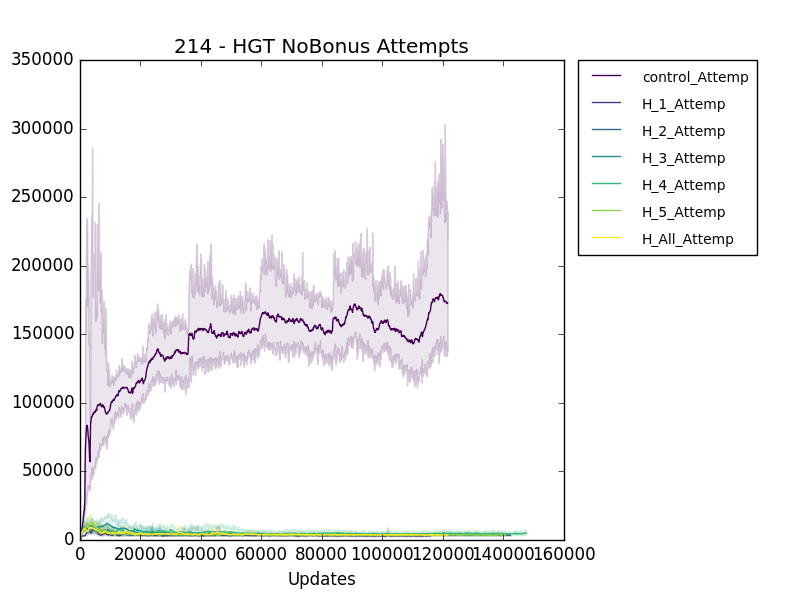

In [22]:
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py \
--error \
--samples 100 \
--title "214 - HGT NoBonus Attempts" \
--xlabel "Updates" --ylabel "Events" --xtick_multiplier 100 \
--data_members 1 \
214_hgt_attempts \
hgt.dat 10 \"../H_1_control_*/data*/\" control_Attemp \
hgt.dat 10 \"../H_1_hgt_*/data*/\" H_1_Attemp \
hgt.dat 10 \"../H_2_hgt_*/data*/\" H_2_Attemp \
hgt.dat 10 \"../H_3_hgt_*/data*/\" H_3_Attemp \
hgt.dat 10 \"../H_4_hgt_*/data*/\" H_4_Attemp \
hgt.dat 10 \"../H_5_hgt_*/data*/\" H_5_Attemp \
hgt.dat 10 \"../H_All_hgt_*/data*/\" H_All_Attemp \


ipyImage(filename='214_hgt_attempts.png') 

## Uptake Rates for all sub-treatments (control, hgt+bonus, etc.)

In [22]:
def plot_it(TREATM, #205 
               PROB, #0.001 
               filename, #hgt.dat
               descr, #HGT Uptakes
               columns, #[7,8]
               colnames, #['U','R'] 
               subtreats, #['control', 'hgt', 'hgtbonus', 'bonus']
               basename, #hgt_uptake_recomb 
               verbose=True, error=True):
    ROOT_TREATMENT="H_"+PROB

    !echo $ROOT_TREATMENT
    !echo $TREATM

    errstr = ""
    if error:
        errstr = "--error --samples 100"
    
    #!python2
    script = ' \
~/Dropbox/School_Docs/Research/research_scripts/quickplot.py ' + errstr + ' \
--title "' + descr + ' (Homol Sites: '+PROB+')" \
--xlabel "Updates" \
--ylabel "Uptake Events" --xtick_multiplier 100 \
--data_members '+ str(len(columns)) +' \
'+TREATM+'_'+basename+'_'+PROB+' \
'
    for trt in subtreats:
        for col, coln in zip(columns, colnames):
            script += filename + ' '\
            + str(col) + ' "../'\
            + ROOT_TREATMENT + '_' + trt + '_*/data*/" ' + trt + '_' + coln + ' '
    
    if verbose:
        script += '\
2>/dev/null'
        print script
    else:
        script += '\
>/dev/null 2>&1'
        print script
        
    !python2 $script
    
    return TREATM+'_'+basename+'_'+PROB+'.png'



In [12]:
def hgt_recomb(TREATM, #205 
               PROB, #0.001
               verbose=True,
               error=True):
    
    return plot_it(TREATM, PROB, "hgt.dat", "HGT Uptakes", 
                   [7,10], ['Uptakes','Attempts'], 
                    #['control', 'hgt', 'hgtbonus', 'bonus'], 
                   ['hgt', 'hgtbonus'], 
                   "hgt_uptake_recomb", verbose=verbose, error=error)
    

H_1
214
 ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py  --title "HGT Uptakes (Homol Sites: 1)" --xlabel "Updates" --ylabel "Uptake Events" --xtick_multiplier 100 --data_members 2 214_hgt_uptake_recomb_1 hgt.dat 7 "../H_1_control_*/data*/" control_Uptake hgt.dat 10 "../H_1_control_*/data*/" control_Attempts hgt.dat 7 "../H_1_hgt_*/data*/" hgt_Uptake hgt.dat 10 "../H_1_hgt_*/data*/" hgt_Attempts hgt.dat 7 "../H_1_hgtbonus_*/data*/" hgtbonus_Uptake hgt.dat 10 "../H_1_hgtbonus_*/data*/" hgtbonus_Attempts hgt.dat 7 "../H_1_bonus_*/data*/" bonus_Uptake hgt.dat 10 "../H_1_bonus_*/data*/" bonus_Attempts 2>/dev/null
Aggregating control_Uptake
Aggregating control_Attempts
Aggregating hgt_Uptake
Aggregating hgt_Attempts
Aggregating hgtbonus_Uptake
Aggregating hgtbonus_Attempts
Aggregating bonus_Uptake
Aggregating bonus_Attempts

Plotting 214_hgt_uptake_recomb_1


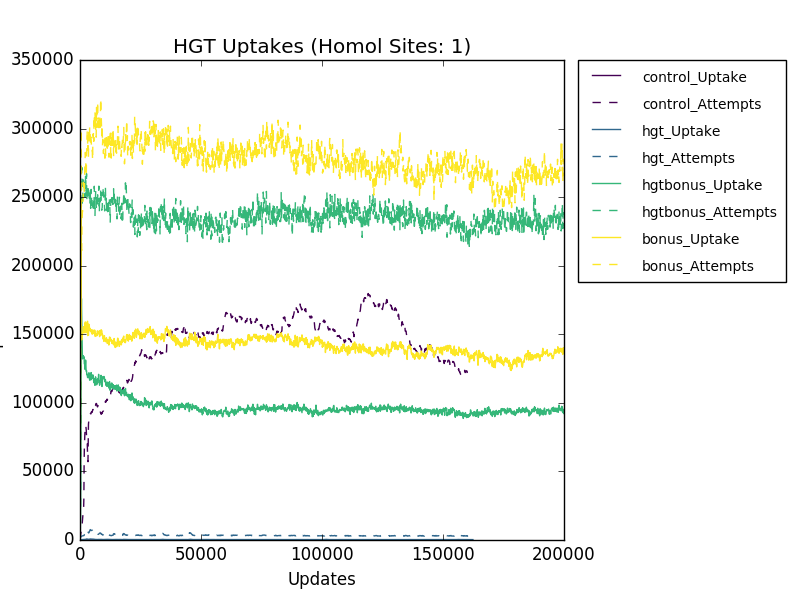

In [23]:
p0 = plot_it("214", "1", "hgt.dat", "HGT Uptakes", 
                   [7,10], ['Uptake','Attempts'], 
                    ['control', 'hgt', 'hgtbonus', 'bonus'],  
                   "hgt_uptake_recomb", verbose=True, error=False )

ipyImage(filename=p0) 

In [ ]:
files = []
files.append( plot_it("214", "1", "hgt.dat", "HGT Uptakes", 
                   [7,10], ['Uptakes','Attempts'], 
                    ['control', 'hgt', 'hgtbonus', 'bonus'],  
                   "hgt_uptake_recomb", verbose=True ))

probs = ['2', '3', '4', '5']
for p in probs:
    files.append(hgt_recomb("214", p, verbose=True))

['214_hgt_uptake_recomb_1.png', '214_hgt_uptake_recomb_2.png', '214_hgt_uptake_recomb_3.png', '214_hgt_uptake_recomb_4.png', '214_hgt_uptake_recomb_5.png']


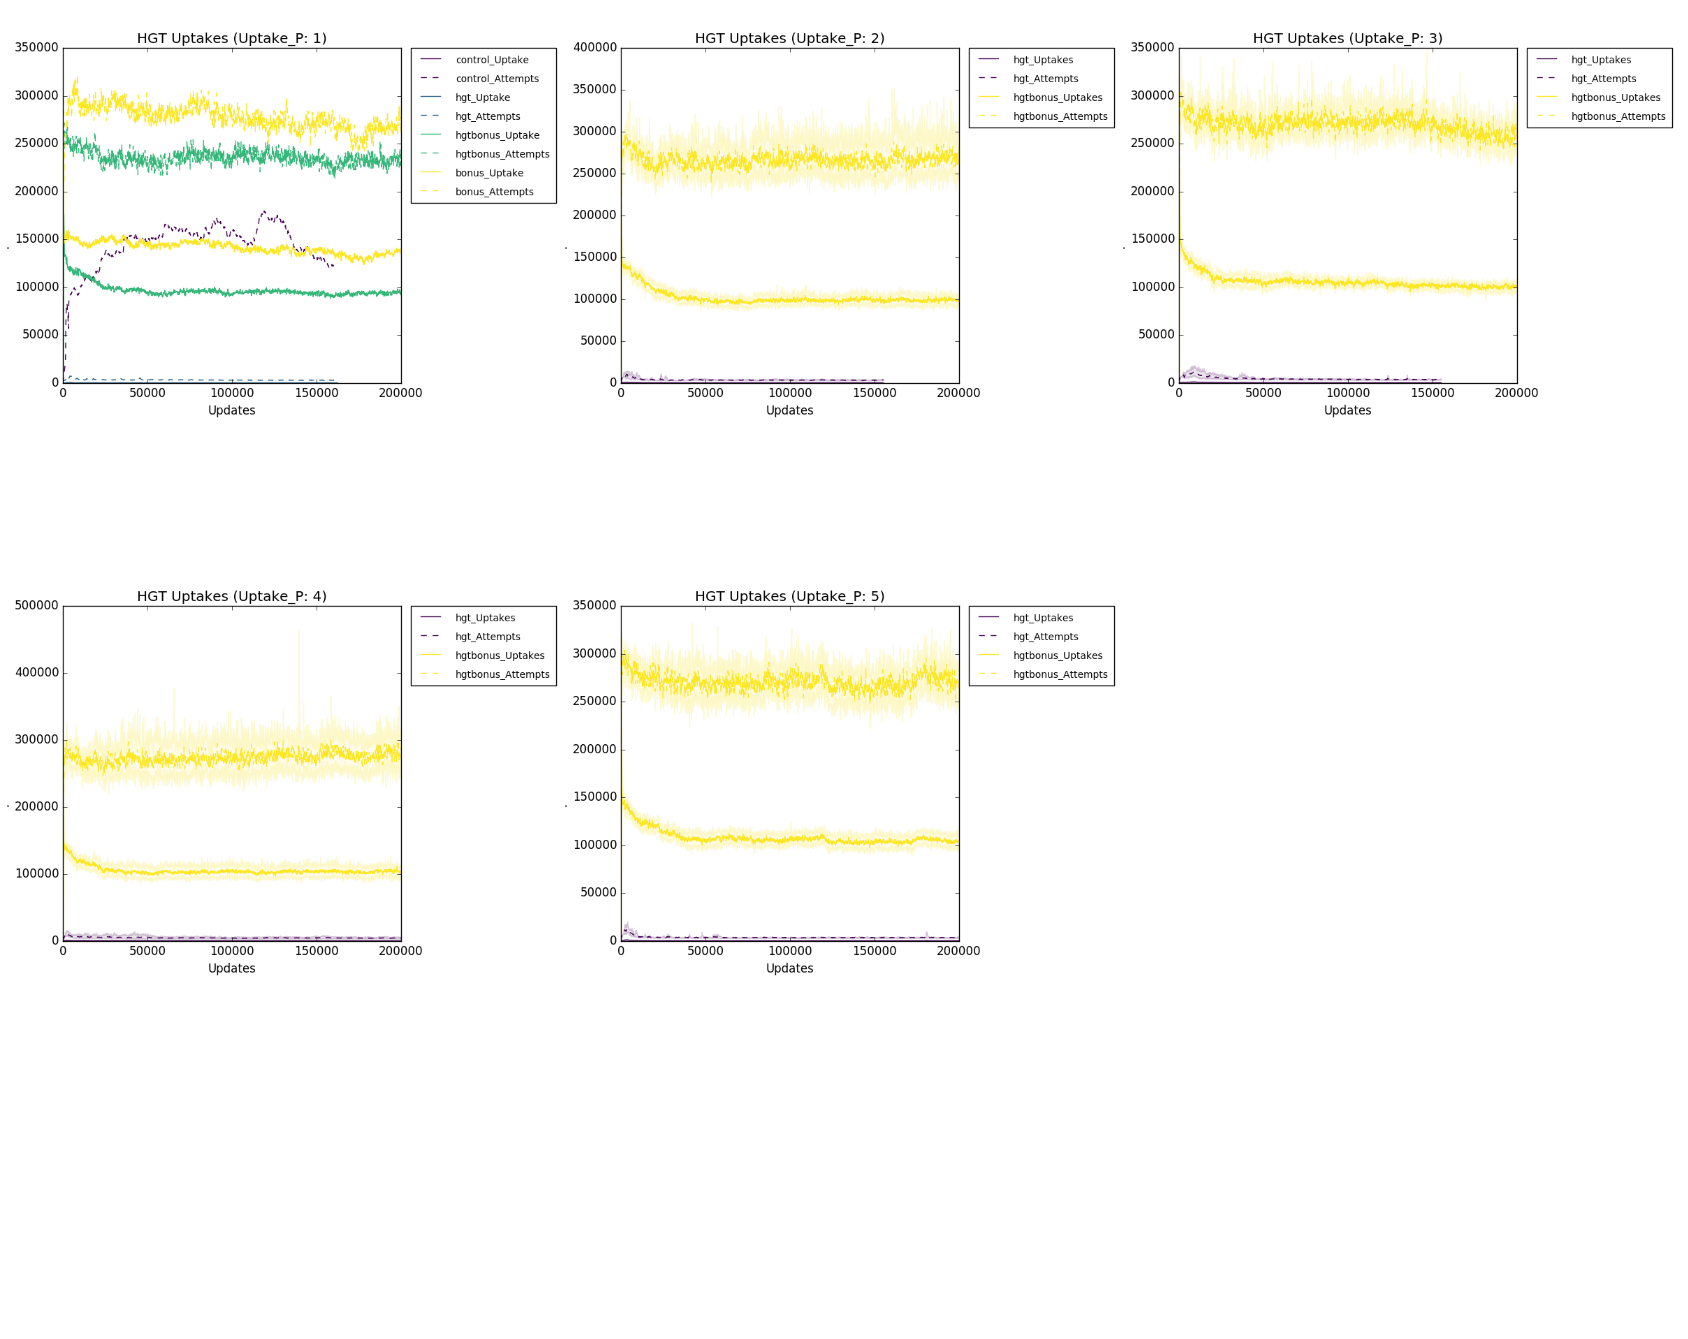

In [16]:
print files

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30,30),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=-0.5, wspace=0)
for i, ax in enumerate(axes.flat, start=1):
    
    if i-1 < len(files):
        img = Image.open(files[i-1])
        ax.imshow(img)

    ax.set_axis_off() 
    i+=1
plt.show()

## Run End-Point Uptake and Recombination Rates

In [46]:
for p in ['0', '0.001', '0.01', '0.1', '0.25', '0.5', '0.75', '1']:
    for t in ['control', 'hgtbonus', 'hgt', 'bonus']:
        PROB = "P_" + p + "_" + t + "_"
        print PROB
        
        outfile1 = PROB + "_uptake_total.csv"
        !rm {outfile1}
        outfile2 = PROB + "_uptake_with_recombination.csv"
        !rm {outfile2}
        outfile3 = PROB + "_uptake_attempts.csv"
        !rm {outfile3}        
        
        files = !ls ../{PROB}2*/data*/hgt.dat
        print files
        files_string = " ".join(files)

        print
        print outfile1
        !python2 ~/Dropbox/School_Docs/Research/research_scripts/common/extract_single_column_to_csv.py \
        --end 7 {files_string} \
        >> {outfile1}

        print
        print outfile2        
        !python2 ~/Dropbox/School_Docs/Research/research_scripts/common/extract_single_column_to_csv.py \
        --end 8 {files_string} \
        >> {outfile2}
        
        print
        print outfile3
        !python2 ~/Dropbox/School_Docs/Research/research_scripts/common/extract_single_column_to_csv.py \
        --end 10 {files_string} \
        >> {outfile3}


P_0_control_
rm: cannot remove ‘P_0_control__uptake_total.csv’: No such file or directory
rm: cannot remove ‘P_0_control__uptake_with_recombination.csv’: No such file or directory
rm: cannot remove ‘P_0_control__uptake_attempts.csv’: No such file or directory
['../P_0_control_208001/data/hgt.dat', '../P_0_control_208002/data/hgt.dat', '../P_0_control_208003/data/hgt.dat', '../P_0_control_208004/data/hgt.dat', '../P_0_control_208005/data/hgt.dat', '../P_0_control_208006/data/hgt.dat', '../P_0_control_208007/data/hgt.dat', '../P_0_control_208008/data/hgt.dat', '../P_0_control_208009/data/hgt.dat', '../P_0_control_208010/data/hgt.dat', '../P_0_control_208011/data/hgt.dat', '../P_0_control_208012/data/hgt.dat', '../P_0_control_208013/data/hgt.dat', '../P_0_control_208014/data/hgt.dat', '../P_0_control_208015/data/hgt.dat', '../P_0_control_208016/data/hgt.dat', '../P_0_control_208017/data/hgt.dat', '../P_0_control_208018/data/hgt.dat', '../P_0_control_208019/data/hgt.dat', '../P_0_control_2

In [47]:
%ls *uptake_total.csv 

P_0.001_bonus___uptake_total.csv     P_0.5_bonus___uptake_total.csv
P_0.001_bonus__uptake_total.csv      P_0.5_bonus__uptake_total.csv
P_0.001_control___uptake_total.csv   P_0.5_control___uptake_total.csv
P_0.001_control__uptake_total.csv    P_0.5_control__uptake_total.csv
P_0.001_hgtbonus___uptake_total.csv  P_0.5_hgtbonus___uptake_total.csv
P_0.001_hgtbonus__uptake_total.csv   P_0.5_hgtbonus__uptake_total.csv
P_0.001_hgt___uptake_total.csv       P_0.5_hgt___uptake_total.csv
P_0.001_hgt__uptake_total.csv        P_0.5_hgt__uptake_total.csv
P_0.01_bonus___uptake_total.csv      P_0.75_bonus___uptake_total.csv
P_0.01_bonus__uptake_total.csv       P_0.75_bonus__uptake_total.csv
P_0.01_control___uptake_total.csv    P_0.75_control___uptake_total.csv
P_0.01_control__uptake_total.csv     P_0.75_control__uptake_total.csv
P_0.01_hgtbonus___uptake_total.csv   P_0.75_hgtbonus___uptake_total.csv
P_0.01_hgtbonus__uptake_total.csv    P_0.75_hgtbonus__uptake_total.csv
P_0.01_hgt___uptake_total.csv    

In [50]:
%ls *_uptake_attempts.csv 

P_0.001_bonus___uptake_attempts.csv     P_0.5_bonus___uptake_attempts.csv
P_0.001_bonus__uptake_attempts.csv      P_0.5_bonus__uptake_attempts.csv
P_0.001_control___uptake_attempts.csv   P_0.5_control___uptake_attempts.csv
P_0.001_control__uptake_attempts.csv    P_0.5_control__uptake_attempts.csv
P_0.001_hgtbonus___uptake_attempts.csv  P_0.5_hgtbonus___uptake_attempts.csv
P_0.001_hgtbonus__uptake_attempts.csv   P_0.5_hgtbonus__uptake_attempts.csv
P_0.001_hgt___uptake_attempts.csv       P_0.5_hgt___uptake_attempts.csv
P_0.001_hgt__uptake_attempts.csv        P_0.5_hgt__uptake_attempts.csv
P_0.01_bonus___uptake_attempts.csv      P_0.75_bonus___uptake_attempts.csv
P_0.01_bonus__uptake_attempts.csv       P_0.75_bonus__uptake_attempts.csv
P_0.01_control___uptake_attempts.csv    P_0.75_control___uptake_attempts.csv
P_0.01_control__uptake_attempts.csv     P_0.75_control__uptake_attempts.csv
P_0.01_hgtbonus___uptake_attempts.csv   P_0.75_hgtbonus___uptake_attempts.csv
P_0.01_hgtbonus__uptake_at

### Uptake Rates

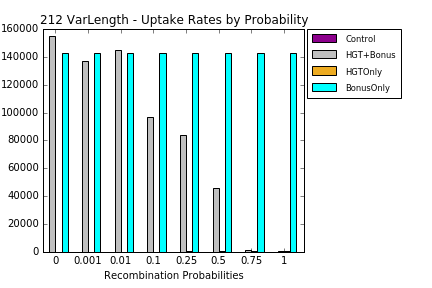

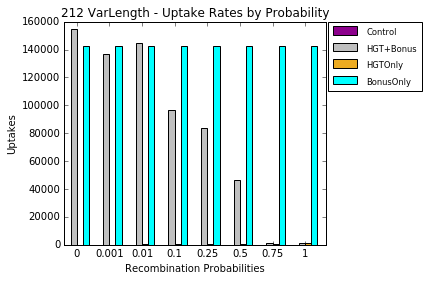

In [49]:
%run ~/Dropbox/School_Docs/Research/research_scripts/graph_generation/bar_chart_from_csv.py \
-x "Recombination Probabilities" -y "Uptakes" \
-t "212 VarLength - Uptake Rates by Probability" --pair --groups=8 \
--xticks="0,0.001,0.01,0.1,0.25,0.5,0.75,1" \
--legend="Control,HGT+Bonus,HGTOnly,BonusOnly" \
--columns="1" \
212_uptakes_by_prob.png \
\
P_0_control__uptake_total.csv \
P_0_hgtbonus__uptake_total.csv \
P_0_hgt__uptake_total.csv \
P_0_bonus__uptake_total.csv \
\
P_0_control__uptake_total.csv \
P_0.001_hgtbonus__uptake_total.csv \
P_0.001_hgt__uptake_total.csv \
P_0_bonus__uptake_total.csv \
\
P_0_control__uptake_total.csv \
P_0.01_hgtbonus__uptake_total.csv \
P_0.01_hgt__uptake_total.csv \
P_0_bonus__uptake_total.csv \
\
P_0_control__uptake_total.csv \
P_0.1_hgtbonus__uptake_total.csv \
P_0.1_hgt__uptake_total.csv \
P_0_bonus__uptake_total.csv \
\
P_0_control__uptake_total.csv \
P_0.25_hgtbonus__uptake_total.csv \
P_0.25_hgt__uptake_total.csv \
P_0_bonus__uptake_total.csv \
\
P_0_control__uptake_total.csv \
P_0.5_hgtbonus__uptake_total.csv \
P_0.5_hgt__uptake_total.csv \
P_0_bonus__uptake_total.csv \
\
P_0_control__uptake_total.csv \
P_0.75_hgtbonus__uptake_total.csv \
P_0.75_hgt__uptake_total.csv \
P_0_bonus__uptake_total.csv \
\
P_0_control__uptake_total.csv \
P_1_hgtbonus__uptake_total.csv \
P_1_hgt__uptake_total.csv \
P_0_bonus__uptake_total.csv 

ipyImage(filename='212_uptakes_by_prob.png') 

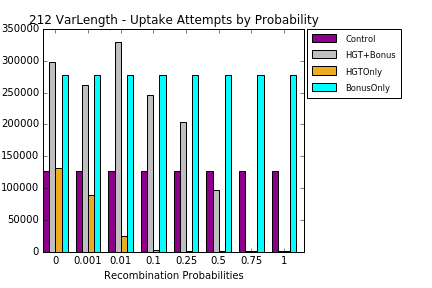

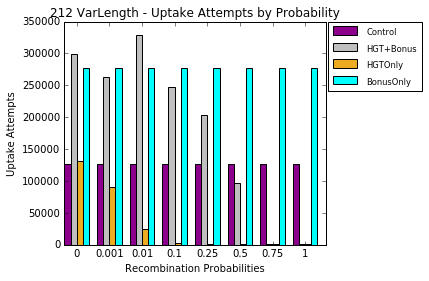

In [51]:
%run ~/Dropbox/School_Docs/Research/research_scripts/graph_generation/bar_chart_from_csv.py \
-x "Recombination Probabilities" -y "Uptake Attempts" \
-t "212 VarLength - Uptake Attempts by Probability" --pair --groups=8 \
--xticks="0,0.001,0.01,0.1,0.25,0.5,0.75,1" \
--legend="Control,HGT+Bonus,HGTOnly,BonusOnly" \
--columns="1" \
212_uptakeattempts_by_prob.png \
\
P_0_control__uptake_attempts.csv \
P_0_hgtbonus__uptake_attempts.csv \
P_0_hgt__uptake_attempts.csv \
P_0_bonus__uptake_attempts.csv \
\
P_0_control__uptake_attempts.csv \
P_0.001_hgtbonus__uptake_attempts.csv \
P_0.001_hgt__uptake_attempts.csv \
P_0_bonus__uptake_attempts.csv \
\
P_0_control__uptake_attempts.csv \
P_0.01_hgtbonus__uptake_attempts.csv \
P_0.01_hgt__uptake_attempts.csv \
P_0_bonus__uptake_attempts.csv \
\
P_0_control__uptake_attempts.csv \
P_0.1_hgtbonus__uptake_attempts.csv \
P_0.1_hgt__uptake_attempts.csv \
P_0_bonus__uptake_attempts.csv \
\
P_0_control__uptake_attempts.csv \
P_0.25_hgtbonus__uptake_attempts.csv \
P_0.25_hgt__uptake_attempts.csv \
P_0_bonus__uptake_attempts.csv \
\
P_0_control__uptake_attempts.csv \
P_0.5_hgtbonus__uptake_attempts.csv \
P_0.5_hgt__uptake_attempts.csv \
P_0_bonus__uptake_attempts.csv \
\
P_0_control__uptake_attempts.csv \
P_0.75_hgtbonus__uptake_attempts.csv \
P_0.75_hgt__uptake_attempts.csv \
P_0_bonus__uptake_attempts.csv \
\
P_0_control__uptake_attempts.csv \
P_1_hgtbonus__uptake_attempts.csv \
P_1_hgt__uptake_attempts.csv \
P_0_bonus__uptake_attempts.csv 

ipyImage(filename='212_uptakeattempts_by_prob.png') 

### Recombination Rates

In [ ]:
%run ~/Dropbox/School_Docs/Research/research_scripts/graph_generation/bar_chart_from_csv.py \
-x "Recombination Probabilities" -y "Uptakes" \
-t "205 VarLength - Recombination Rates by Probability" --pair --groups=8 \
--ylim_max 45000 \
--xticks="0,0.001,0.01,0.1,0.25,0.5,0.75,1" \
--legend="Control,HGT+Bonus,HGTOnly,BonusOnly" \
--columns="1" \
205_recombinations_by_prob.png \
\
P_0_control__uptake_with_recombination.csv \
P_0_hgtbonus__uptake_with_recombination.csv \
P_0_hgt__uptake_with_recombination.csv \
P_0_bonus__uptake_with_recombination.csv \
\
P_0.001_control__uptake_with_recombination.csv \
P_0.001_hgtbonus__uptake_with_recombination.csv \
P_0.001_hgt__uptake_with_recombination.csv \
P_0.001_bonus__uptake_with_recombination.csv \
\
P_0.01_control__uptake_with_recombination.csv \
P_0.01_hgtbonus__uptake_with_recombination.csv \
P_0.01_hgt__uptake_with_recombination.csv \
P_0.01_bonus__uptake_with_recombination.csv \
\
P_0.1_control__uptake_with_recombination.csv \
P_0.1_hgtbonus__uptake_with_recombination.csv \
P_0.1_hgt__uptake_with_recombination.csv \
P_0.1_bonus__uptake_with_recombination.csv \
\
P_0.25_control__uptake_with_recombination.csv \
P_0.25_hgtbonus__uptake_with_recombination.csv \
P_0.25_hgt__uptake_with_recombination.csv \
P_0.25_bonus__uptake_with_recombination.csv \
\
P_0.5_control__uptake_with_recombination.csv \
P_0.5_hgtbonus__uptake_with_recombination.csv \
P_0.5_hgt__uptake_with_recombination.csv \
P_0.5_bonus__uptake_with_recombination.csv \
\
P_0.75_control__uptake_with_recombination.csv \
P_0.75_hgtbonus__uptake_with_recombination.csv \
P_0.75_hgt__uptake_with_recombination.csv \
P_0.75_bonus__uptake_with_recombination.csv \
\
P_1_control__uptake_with_recombination.csv \
P_1_hgtbonus__uptake_with_recombination.csv \
P_1_hgt__uptake_with_recombination.csv \
P_1_bonus__uptake_with_recombination.csv 

ipyImage(filename='205_recombinations_by_prob.png') 

In [ ]:
%run ~/Dropbox/School_Docs/Research/research_scripts/graph_generation/bar_chart_from_csv.py \
-x "Recombination Probabilities" -y "Uptakes" \
-t "200 VarLength - Recombination Rates by Probability" --pair --groups=8 \
--ylim_max 25000 \
--xticks="0,0.001,0.01,0.1,0.25,0.5,0.75,1" \
--legend="Control,HGT+Bonus,HGTOnly,BonusOnly" \
--columns="1" \
200_relevant_recombinations_by_prob.png \
\
P_0_hgtbonus__uptake_with_recombination.csv \
P_0_hgt__uptake_with_recombination.csv \
\
P_0.001_hgtbonus__uptake_with_recombination.csv \
P_0.001_hgt__uptake_with_recombination.csv \
\
P_0.01_hgtbonus__uptake_with_recombination.csv \
P_0.01_hgt__uptake_with_recombination.csv \
\
P_0.1_hgtbonus__uptake_with_recombination.csv \
P_0.1_hgt__uptake_with_recombination.csv \
\
P_0.25_hgtbonus__uptake_with_recombination.csv \
P_0.25_hgt__uptake_with_recombination.csv \
\
P_0.5_hgtbonus__uptake_with_recombination.csv \
P_0.5_hgt__uptake_with_recombination.csv \
\
P_0.75_hgtbonus__uptake_with_recombination.csv \
P_0.75_hgt__uptake_with_recombination.csv \
\
P_1_hgtbonus__uptake_with_recombination.csv \
P_1_hgt__uptake_with_recombination.csv 

ipyImage(filename='200_relevant_recombinations_by_prob.png') 

## Genome Lengths - Copied and Executed

Aggregating control_c
Aggregating control_e
Aggregating P_0_c
Aggregating P_0_e
Aggregating P_0.001_c
Aggregating P_0.001_e
Aggregating P_0.01_c
Aggregating P_0.01_e
Aggregating P_0.1_c
Aggregating P_0.1_e
Aggregating P_0.5_c
Aggregating P_0.5_e
Aggregating P_1_c
Aggregating P_1_e

Plotting 212_copied_and_exec_size


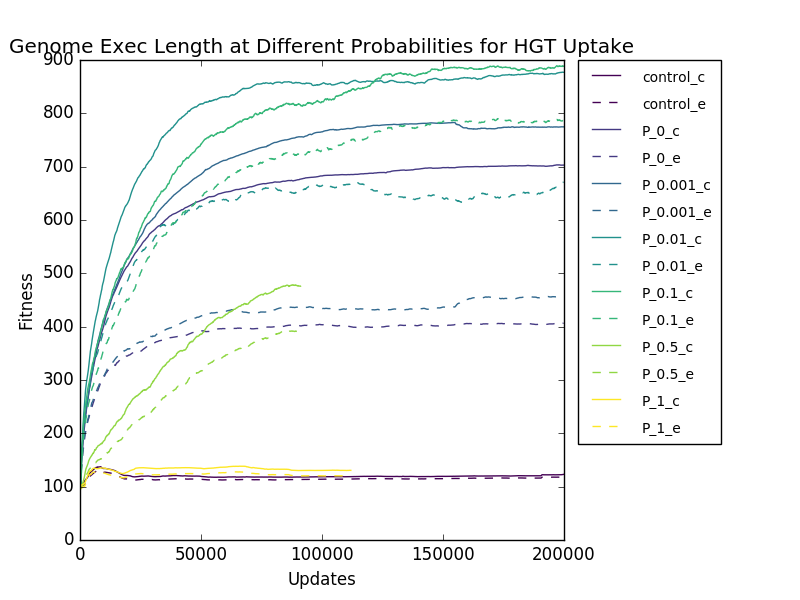

In [52]:
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py --samples 1000 \
--title "Genome Exec Length at Different Probabilities for HGT Uptake" \
--xlabel "Updates" --ylabel "Fitness" --xtick_multiplier 100 \
--data_members 2 \
212_copied_and_exec_size \
average.dat 7 \"../P_0_control_*/data*/\" control_c \
average.dat 8 \"../P_0_control_*/data*/\" control_e \
average.dat 7 \"../P_0_hgtbonus_*/data*/\" P_0_c \
average.dat 8 \"../P_0_hgtbonus_*/data*/\" P_0_e \
average.dat 7 \"../P_0.001_hgtbonus_*/data*/\" P_0.001_c \
average.dat 8 \"../P_0.001_hgtbonus_*/data*/\" P_0.001_e \
average.dat 7 \"../P_0.01_hgtbonus_*/data*/\" P_0.01_c \
average.dat 8 \"../P_0.01_hgtbonus_*/data*/\" P_0.01_e \
average.dat 7 \"../P_0.1_hgtbonus_*/data*/\" P_0.1_c \
average.dat 8 \"../P_0.1_hgtbonus_*/data*/\" P_0.1_e \
average.dat 7 \"../P_0.5_hgtbonus_*/data*/\" P_0.5_c \
average.dat 8 \"../P_0.5_hgtbonus_*/data*/\" P_0.5_e \
average.dat 7 \"../P_1_hgtbonus_*/data*/\" P_1_c \
average.dat 8 \"../P_1_hgtbonus_*/data*/\" P_1_e 

ipyImage(filename='212_copied_and_exec_size.png') 

In [53]:
for p in ['0', '0.001', '0.01', '0.1', '0.25', '0.5', '0.75', '1']:
    for t in ['hgtbonus', 'hgt']:
        PROB = "P_" + p + "_" + t
        print PROB
        
        outfile1 = PROB + "__genome_length_executed.csv"
        !rm {outfile1}
        outfile2 = PROB + "__genome_length_copied.csv"
        !rm {outfile2}
        
        files = !ls ../{PROB}2*/data_*/average.dat
        files_string = " ".join(files)

        !python2 ~/Dropbox/School_Docs/Research/research_scripts/common/extract_single_column_to_csv.py \
        --end 7 {files_string} \
        >> {outfile1}
        
        !python2 ~/Dropbox/School_Docs/Research/research_scripts/common/extract_single_column_to_csv.py \
        --end 8 {files_string} \
        >> {outfile2}


P_0_hgtbonus
rm: cannot remove ‘P_0_hgtbonus__genome_length_executed.csv’: No such file or directory
rm: cannot remove ‘P_0_hgtbonus__genome_length_copied.csv’: No such file or directory
Traceback (most recent call last):
  File "/home/rosiec/Dropbox/School_Docs/Research/research_scripts/common/extract_single_column_to_csv.py", line 134, in <module>
    fd = open(inputfilename)
IOError: [Errno 2] No such file or directory: 'ls:'
Traceback (most recent call last):
  File "/home/rosiec/Dropbox/School_Docs/Research/research_scripts/common/extract_single_column_to_csv.py", line 134, in <module>
    fd = open(inputfilename)
IOError: [Errno 2] No such file or directory: 'ls:'
P_0_hgt
rm: cannot remove ‘P_0_hgt__genome_length_executed.csv’: No such file or directory
rm: cannot remove ‘P_0_hgt__genome_length_copied.csv’: No such file or directory
Traceback (most recent call last):
  File "/home/rosiec/Dropbox/School_Docs/Research/research_scripts/common/extract_single_column_to_csv.py", line 1

In [ ]:
%run ~/Dropbox/School_Docs/Research/research_scripts/graph_generation/bar_chart_from_csv.py \
-x "Recombination Probabilities" -y "Genome Length" \
-t "200 VarLength HGT+Bonus - Genome Lengths" --pair --groups=8 \
--xticks="0,0.001,0.01,0.1,0.25,0.5,0.75,1" \
--legend="LengthExecuted,LengthCopied" \
--columns="1" \
200_genome_lengths.png \
P_0_hgtbonus__genome_length_executed.csv \
P_0_hgtbonus__genome_length_copied.csv \
P_0.001_hgtbonus__genome_length_executed.csv \
P_0.001_hgtbonus__genome_length_copied.csv \
P_0.01_hgtbonus__genome_length_executed.csv \
P_0.01_hgtbonus__genome_length_copied.csv \
P_0.1_hgtbonus__genome_length_executed.csv \
P_0.1_hgtbonus__genome_length_copied.csv \
P_0.25_hgtbonus__genome_length_executed.csv \
P_0.25_hgtbonus__genome_length_copied.csv \
P_0.5_hgtbonus__genome_length_executed.csv \
P_0.5_hgtbonus__genome_length_copied.csv \
P_0.75_hgtbonus__genome_length_executed.csv \
P_0.75_hgtbonus__genome_length_copied.csv \
P_1_hgtbonus__genome_length_executed.csv \
P_1_hgtbonus__genome_length_copied.csv

ipyImage(filename='200_genome_lengths.png') 

## HGT Uptake Instruction Counts and Proportions

In [ ]:
for p in ['0', '0.001', '0.01', '0.1', '0.25', '0.5', '0.75', '1']:
    for t in ['hgtbonus', 'hgt']:
        PROB = "P_" + p + "_" + t
        print PROB
        !rm {PROB}_HGT_instructions.csv
        files = !ls ../{PROB}_200*/data_*/living_*

        for f in files:
            !python2 ~/Dropbox/School_Docs/Research/research_scripts/common/count_instructions.py "A" {f} \
            >> {PROB}_HGT_instructions.csv

In [ ]:
for p in ['0', '0.001', '0.01', '0.1', '0.25', '0.5', '0.75', '1']:
    for t in ['control', 'hgtbonus', 'hgt', 'bonus']:
        PROB = "P_" + p + "_" + t
        print PROB
        !rm {PROB}_HGT_proportion_instructions.csv
        files = !ls ../{PROB}_205*/data_*/living_*
    
        #print files
        
        for f in files:
            !python2 ~/Dropbox/School_Docs/Research/research_scripts/common/count_instructions.py -p "A" {f} \
            >> {PROB}_HGT_proportion_instructions.csv

In [ ]:
%run ~/Dropbox/School_Docs/Research/research_scripts/graph_generation/bar_chart_from_csv.py \
-x "Recombination Probabilities" -y "Proportion of Instructions" \
-t "205 VarLength - HGT+Bonus - Instruction Proportion" --pair --groups=9 \
--xticks="control,0,0.001,0.01,0.1,0.25,0.5,0.75,1" \
--legend="Proportions" \
--columns="1" \
205_values_and_proportions_HGT_inst.png \
P_0_control_HGT_proportion_instructions.csv \
P_0_hgtbonus_HGT_proportion_instructions.csv \
P_0.001_hgtbonus_HGT_proportion_instructions.csv \
P_0.01_hgtbonus_HGT_proportion_instructions.csv \
P_0.1_hgtbonus_HGT_proportion_instructions.csv \
P_0.25_hgtbonus_HGT_proportion_instructions.csv \
P_0.5_hgtbonus_HGT_proportion_instructions.csv \
P_0.75_hgtbonus_HGT_proportion_instructions.csv \
P_1_hgtbonus_HGT_proportion_instructions.csv


ipyImage(filename='205_values_and_proportions_HGT_inst.png') 

In [ ]:
%run ~/Dropbox/School_Docs/Research/research_scripts/graph_generation/bar_chart_from_csv.py \
-x "Recombination Probabilities" -y "Instructions" \
-t "205 VarLength - HGT+Bonus - Instruction Counts" --pair --groups=9 \
--xticks="control,0,0.001,0.01,0.1,0.25,0.5,0.75,1" \
--legend="Instructions" \
--columns="1" \
205_counts_HGT_inst.png \
P_0_control_HGT_instructions.csv \
P_0_hgtbonus_HGT_instructions.csv \
P_0.001_hgtbonus_HGT_instructions.csv \
P_0.01_hgtbonus_HGT_instructions.csv \
P_0.1_hgtbonus_HGT_instructions.csv \
P_0.25_hgtbonus_HGT_instructions.csv \
P_0.5_hgtbonus_HGT_instructions.csv \
P_0.75_hgtbonus_HGT_instructions.csv \
P_1_hgtbonus_HGT_instructions.csv

ipyImage(filename='205_counts_HGT_inst.png') 

In [ ]:
files2 = ['205_values_and_proportions_HGT_inst.png',
 '205_counts_HGT_inst.png']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=-0.5, wspace=-0.45)
for i, ax in enumerate(axes.flat, start=1):
    
    if i-1 < len(files):
        img = Image.open(files2[i-1])
        ax.imshow(img)

    ax.set_axis_off() 
    i+=1
plt.show()